In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [6]:
df = pd.read_csv('./churn-data.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Cleaning**



## Customer id is useless, so dropping this column

In [8]:
df.drop('customerID', axis='columns', inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Since the totalCharges is an Object(string), we have to convert it into a float

In [10]:
pd.to_numeric(df.TotalCharges, errors='coerce')
# errors='coerce' ignors the errors and put blank over Totalcharges where error occurs

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

## Finding all the rows where TotalCharges are blank

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [13]:
df.shape

(7043, 20)

## Dropping 11 rows out of 7043 rows seems fine

In [14]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Now the data type of TotalCharges is float

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


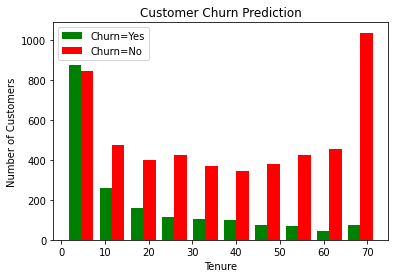

In [17]:
## All the customers who are not leaving the company
tenure_churn_no = df1[df1.Churn == 'No'].tenure

## All the customers who are leaving the company
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

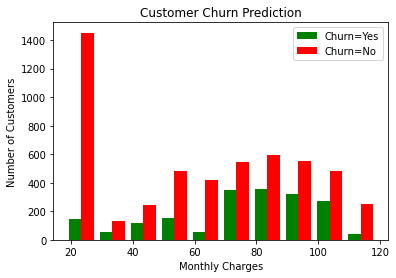

In [18]:
## All the customers who are not leaving the company
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

## All the customers who are leaving the company
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

## Defining a function to get all the columns which contain objects and finds unique values in those columns 

In [22]:
def print_unique_col_values(df):
  for column in df :
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## **All the above columns which contain *'No internet Service'*, *'No phone service'* , etc. , We will simply convert it to No, because it is same as no**

In [28]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
# inplace=True modifies the dataframe ( we do not have to )

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [29]:
print_unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## Converting Yes and No to 1 and 0

In [31]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## All the only Yes and No containing columns are converted to 1 and 0 columns

In [32]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


## Replacing gender column with 0 and 1 too

In [33]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

## One hot encoding to convert columns containing more than three categories to columns with binary data

In [38]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
469,1,0,1,1,13,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4960,0,1,0,0,50,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3447,0,0,0,0,39,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4824,0,1,1,0,72,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
6454,1,0,0,0,41,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [39]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6841,0,0,0,0,5,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1352,0,0,1,1,72,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
5256,0,0,1,1,52,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1071,1,0,0,0,2,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4775,1,0,1,0,24,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [40]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## These columns are not in 0 to 1 range, so we will scale these

In [41]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # scale the data in a range from 0 to 1
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [48]:
df2['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

# **Model Building Starts**

In [51]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [54]:
X_train.shape


(5625, 26)

In [55]:
X_test.shape

(1407, 26)

## Importing Tensorflow

In [56]:
import tensorflow as tf
from tensorflow import keras

In [89]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Start from less number of epochs and see how the model performs and decide whether you need to do something to optimize

In [91]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.7657
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7957
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8025
Epoch 4/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8069
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8062
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8071
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8048
Epoch 8/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8105
Epoch 9/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4034 - accuracy: 0.8069
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8117

In [92]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7825


[0.4708845913410187, 0.7825160026550293]

In [93]:
yp = model.predict(X_test)
yp[:5]

array([[0.28087884],
       [0.3635724 ],
       [0.00701496],
       [0.86219823],
       [0.5258182 ]], dtype=float32)

In [94]:
y_pred = []
for y in yp:
  if y > 0.5 :
    y_pred.append(1)
  else: y_pred.append(0)

## Printing a classification report

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

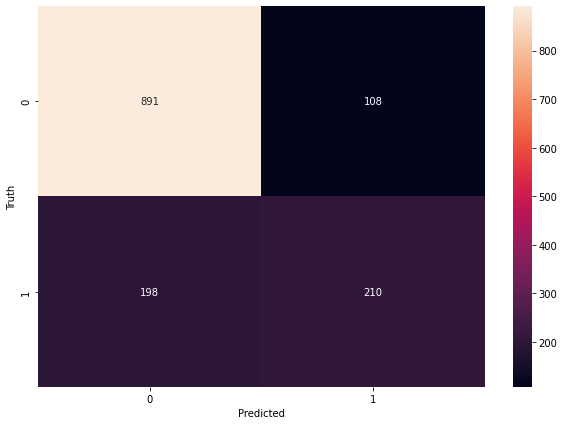

In [96]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
round((908 + 179) / (908 + 179 + 229 + 91), 2)

0.77